In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

"Security-wise Price volume & Deliverable postion data" obtained from :
    https://www.nseindia.com/products/content/equities/equities/eq_security.htm

In [3]:
data_file = "infy.csv"

Corporate Announcements data obtained from : https://www.nseindia.com/corporates/corporateHome.html?id=eqCorpAnnouncements&radio_btn=company&param=INFY

In [4]:
events_file = "infy events.csv"

In [5]:
def get_data(data_file):
    data = pd.read_csv(data_file)
    colnames = {
            'Symbol':"sym", 'Series':"ser", 'Date':"date", 
            'Prev Close':"pc", 'Open Price':"o", 'High Price':"h",
            'Low Price':"l", 'Last Price':"ltp", 'Close Price':"c", 
            'Average Price':"ap",'Total Traded Quantity':"totalqty", 
            'Turnover':"turnover",'No. of Trades':"trades", 
            'Deliverable Qty':"delqty",'% Dly Qt to Traded Qty':"delbytotal"
           }
    data.rename(columns = colnames, inplace = True)
    data['sma5'] = data.c.rolling( window = 5).mean()
    data['sma8'] = data.c.rolling( window = 8).mean()
    data['change'] = data.c.diff()
    data["date"] = pd.to_datetime(data.date)
    data = data.sort_values(by = ["date"])
    data = data.set_index(pd.DatetimeIndex(data["date"]))
    return data

In [6]:
data = get_data(data_file)
data.head()

,sym,ser,date,pc,o,h,l,ltp,c,ap,totalqty,turnover,trades,delqty,delbytotal,sma5,sma8,change
date,,,,,,,,,,,,,,,,,,
2018-01-01,INFY,EQ,2018-01-01,1042.05,1037.70,1044.5,1030.0,1032.15,1033.55,1036.23,2715670,2.814046e+09,65839,1776744,65.43,NaN,NaN,NaN
2018-01-02,INFY,EQ,2018-01-02,1033.55,1037.25,1042.0,1023.0,1028.30,1029.70,1031.43,3056124,3.152175e+09,122157,2066488,67.62,NaN,NaN,-3.85
2018-01-03,INFY,EQ,2018-01-03,1029.70,1028.50,1031.6,1018.6,1022.00,1021.30,1022.55,3423276,3.500475e+09,132588,2428553,70.94,NaN,NaN,-8.40
2018-01-04,INFY,EQ,2018-01-04,1021.30,1021.00,1021.0,1009.6,1015.00,1015.40,1014.48,4473807,4.538566e+09,81236,3101206,69.32,NaN,NaN,-5.90
2018-01-05,INFY,EQ,2018-01-05,1015.40,1015.30,1026.4,1006.0,1014.25,1012.00,1012.92,5512988,5.584194e+09,134727,3907486,70.88,1022.39,NaN,-3.40


In [7]:
def plot_ohlc(data):    
    plt.rcParams["figure.figsize"]  = [20,8]
    plt.plot(data.c, label = "Close" )
    #plt.plot(data.sma5, label ="sma5")
    #plt.plot(data.sma8, label ="sma8")
    plt.plot(data.o, label = "Open")
    plt.plot(data.h, label = "High")
    plt.plot(data.l, label = "Low")
    plt.legend()

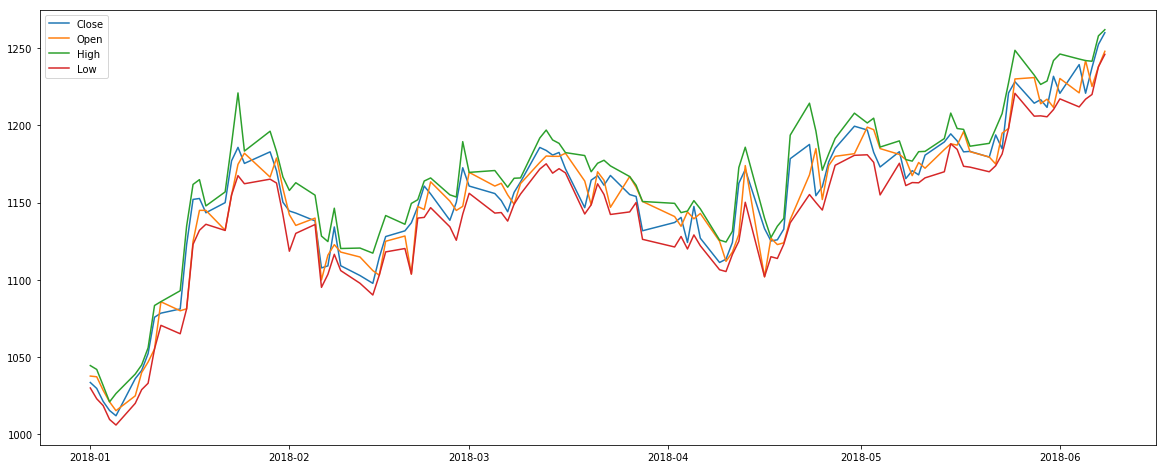

In [8]:
plot_ohlc(data)

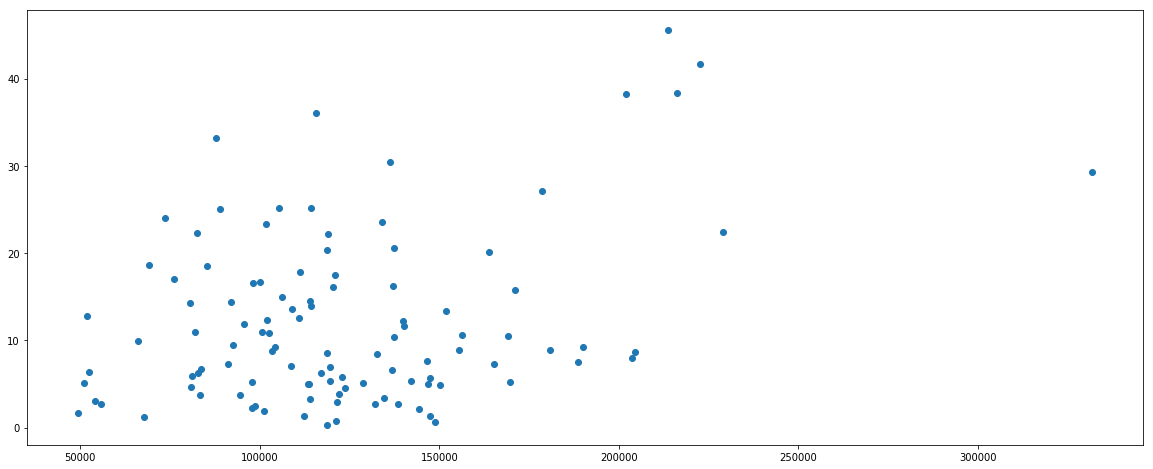

In [9]:
plt.scatter(data.trades, abs(data.change))

In [10]:
def get_eventsdata(events_file):
    evdata = pd.read_csv(events_file)
    evcolnames = {
                "Symbol":"sym",
                "Company":"company",
                "Industry":"industry",
                "Subject":"event",
                "Broadcast Date/Time":"datetime"
                }
    evdata.rename(columns = evcolnames, inplace = True)
    evdata["datetime"] = pd.to_datetime(evdata.datetime)
    evdata["event"] = evdata["event"].astype('category')
    evdata["date"] = evdata.datetime.dt.date
    evdata = evdata.sort_values(by = ["date"])
    evdata = evdata.set_index(pd.DatetimeIndex(evdata["date"]))
    return evdata["2018"]

In [11]:
evdata = get_eventsdata(events_file)

In [12]:
evdata.dtypes

sym                 object
company             object
industry            object
event             category
datetime    datetime64[ns]
date                object
dtype: object

In [13]:
evdata["event"].describe()

count                71
unique               13
top       Press Release
freq                 35
Name: event, dtype: object

In [14]:
print(evdata["event"].unique()[0])

Press Release
